<h2>EDA on Online Sales Data</h2>

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import statsmodels.api as sm

In [151]:
# Set visual display settings
sns.set(style='whitegrid')

<h4>Load CSV</h4>

In [152]:
df = pd.read_csv('https://query.data.world/s/mk2674xbgxftbqgrlwd7u2aps2pmrm?dws=00000')
# Add a new column 'Strata' with random values between 0 and 1

<h4>DF Overview</h4>

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [154]:
df.shape

(240, 9)

<h4>Handling Missisng Values</h4>

In [155]:
# identify columns with missing values
df.isnull().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [156]:
# for numeric column
# df['col'] = df['col'].fillna(0)

# for non-numer cols replace with appropriate string
# df['col'] = df['col'].fillna('blah!')

<h3>Handling Duplicate Rows</h3>

In [157]:
# check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [158]:
# remove duplicate rows
df = df.drop_duplicates()

<h3>Standardizing formats</h3>

In [159]:
# Format to ISO 8601 (YYYY-MM-DD)
df['Date'] = pd.to_datetime(df['Date']).dt.date

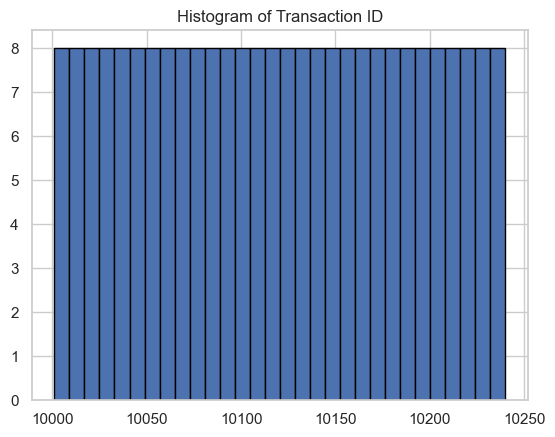

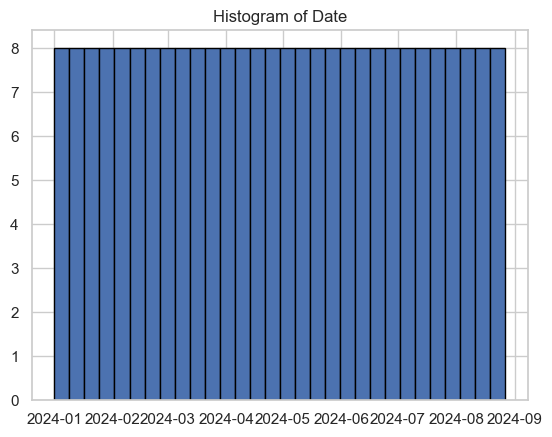

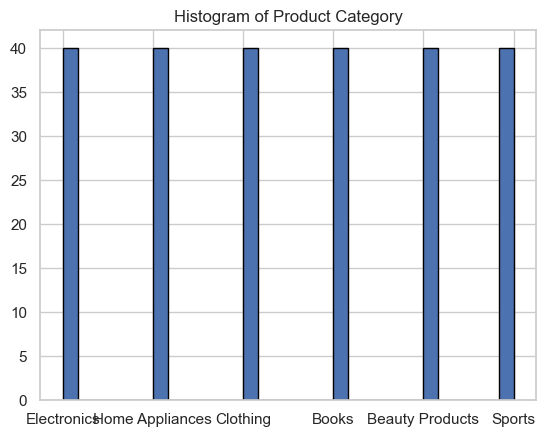

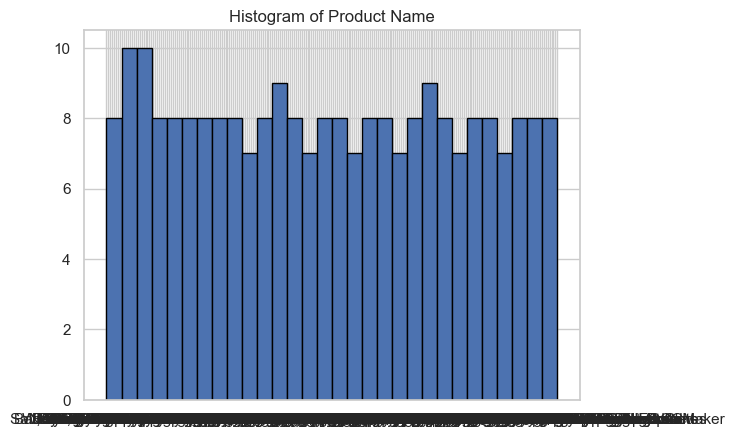

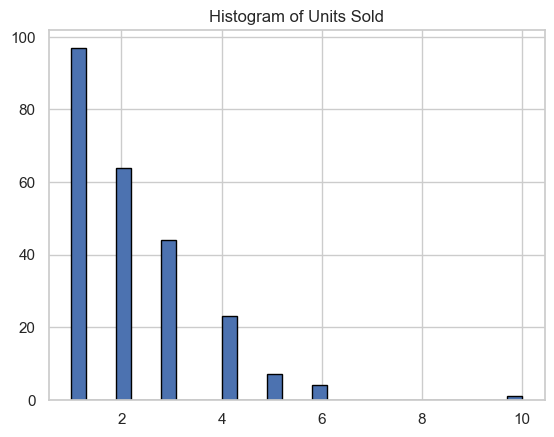

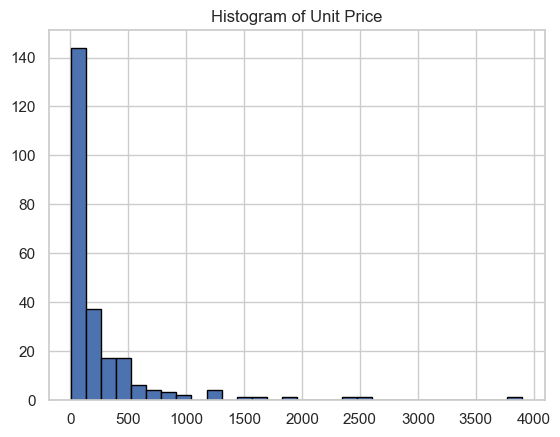

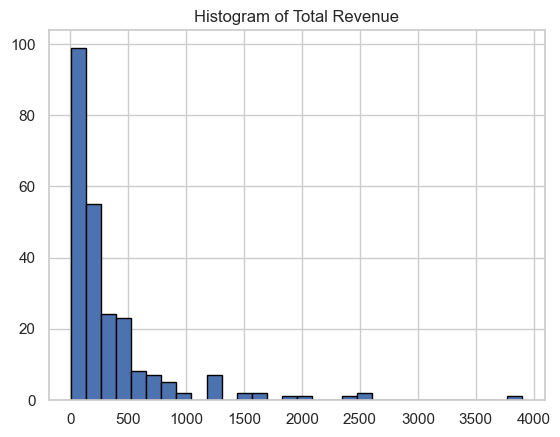

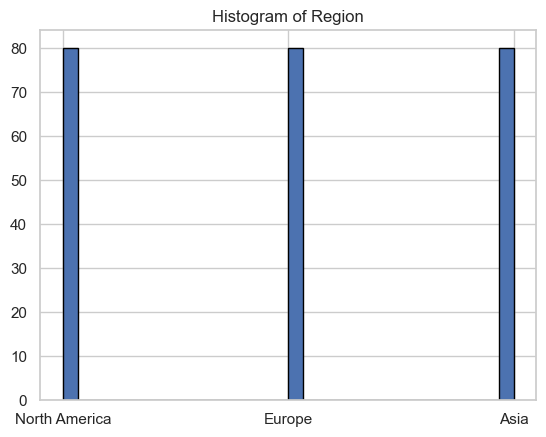

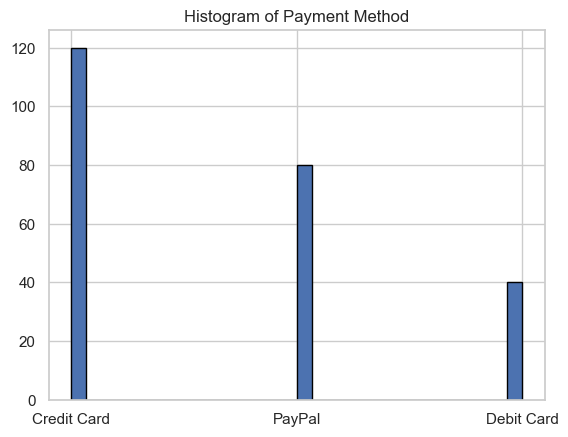

In [160]:
for column in df.columns:
    plt.figure()
    plt.hist(df[column], bins=30, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.show()


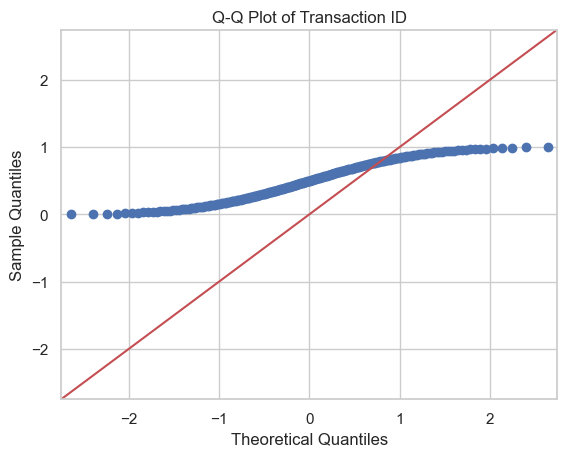

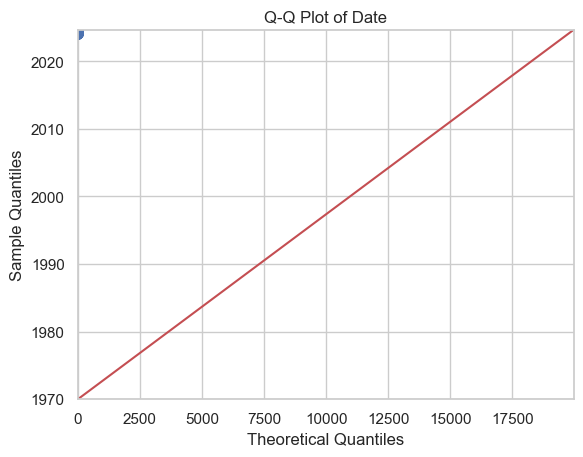

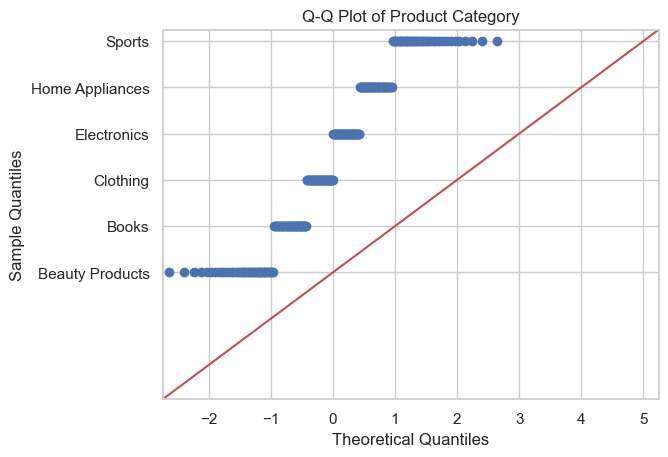

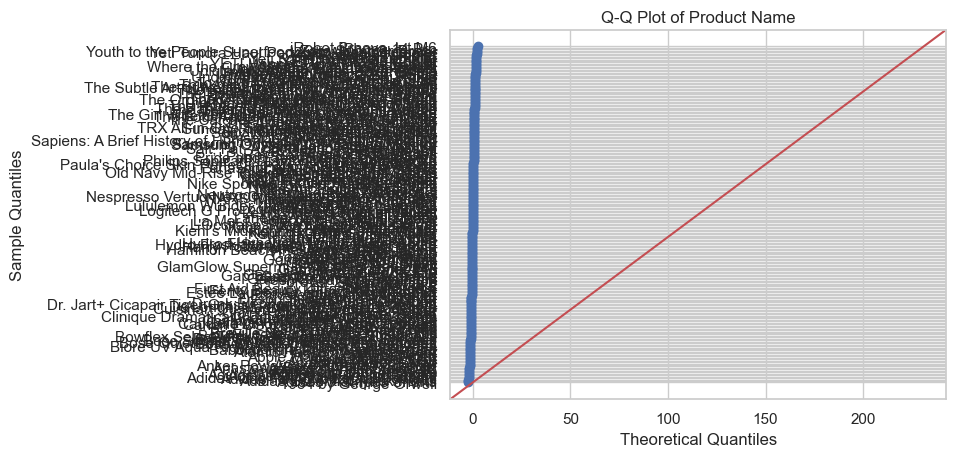

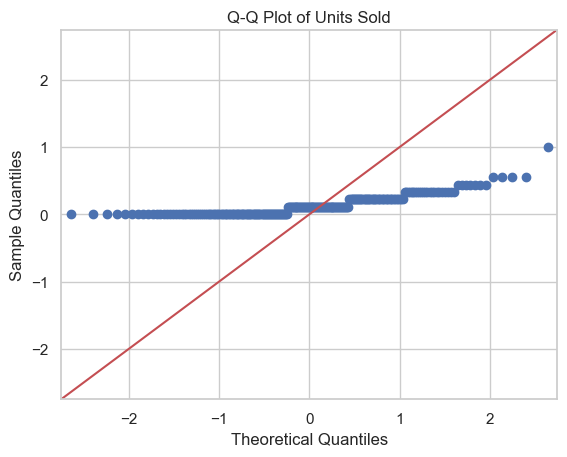

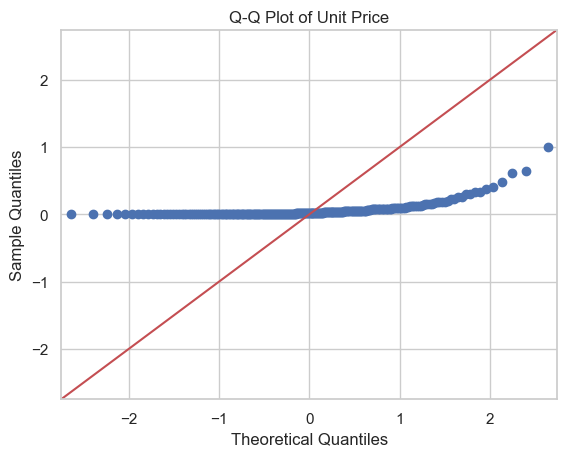

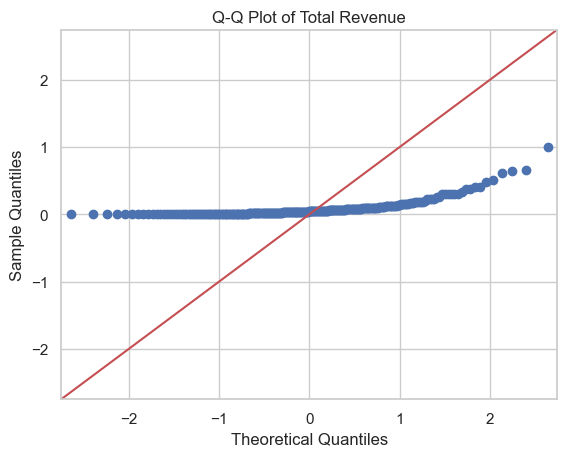

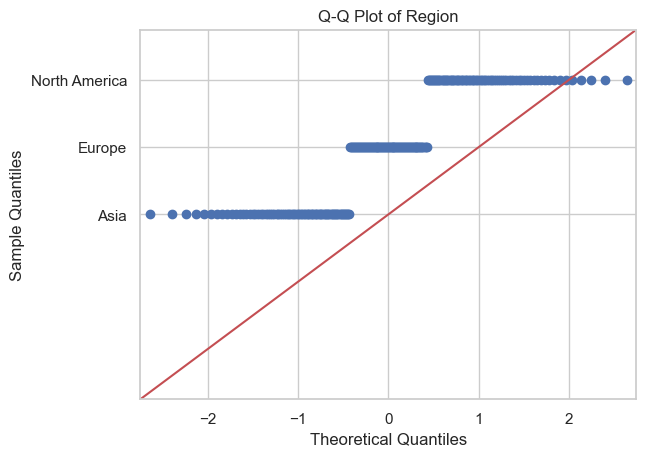

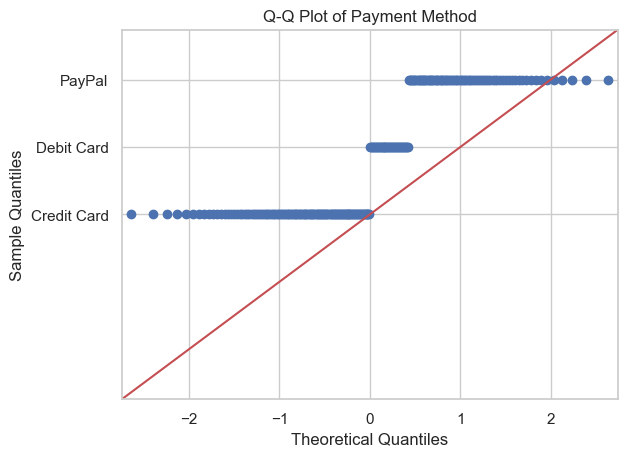

In [162]:
for column in df.columns:
    sm.qqplot(df[column], line='45')
    plt.title(f'Q-Q Plot of {column}')
    plt.show()

<h4>Normalizing Data</h4>

In [161]:
# rescales the data to a fixed range, typically [0, 1]. 
# to maintain data integrity and prevent anomalies during data operations
# identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Normalizing numerical columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the normalized DataFrame
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,0.000000,2024-01-01,Electronics,iPhone 14 Pro,0.111111,0.255167,0.512003,North America,Credit Card
1,0.004184,2024-01-02,Home Appliances,Dyson V11 Vacuum,0.000000,0.126747,0.126747,Europe,PayPal
2,0.008368,2024-01-03,Clothing,Levi's 501 Jeans,0.222222,0.016307,0.052259,Asia,Debit Card
3,0.012552,2024-01-04,Books,The Da Vinci Code,0.333333,0.002437,0.014758,North America,Credit Card
4,0.016736,2024-01-05,Beauty Products,Neutrogena Skincare Set,0.000000,0.021443,0.021443,Europe,PayPal
